# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import datetime
    
# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 624


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
unit = "metric"

# Create counters
record_count = 1
set_count = 1

#Create DataFrame
city_data_df = pd.DataFrame({"City" : cities})
city_data_df["Country"] = ""
city_data_df["Date"] = ""      
city_data_df["Latitude"] = ""
city_data_df["Longitude"] = ""
city_data_df["Cloudiness (%)"] = ""
city_data_df["Humidity (%)"] = ""
city_data_df["Max Temp (C)"] = ""
city_data_df["Wind Speed (mph)"] = ""


# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")


# Loop through all the cities in our list to fetch weather data
for index, row in city_data_df.iterrows():

    city = row["City"] 
    city_url = url + "appid=" + weather_api_key + "&units=" + unit + "&q=" + city
    city_response = requests.get(city_url).json()

    try:
        print(f"Processing Record {record_count}  of Set {set_count} | {city}.")

        city_data_df.loc[index, "Country"] = city_response["sys"]["country"]     
        city_data_df.loc[index, "Date"] = datetime.datetime.fromtimestamp(city_response["dt"])
        city_data_df.loc[index, "Latitude"] = city_response["coord"]["lat"]
        city_data_df.loc[index, "Longitude"] = city_response["coord"]["lon"]
        city_data_df.loc[index, "Cloudiness (%)"] = city_response["clouds"]["all"]
        city_data_df.loc[index, "Humidity (%)"] = city_response["main"]["humidity"]
        city_data_df.loc[index, "Max Temp (C)"] = city_response["main"]["temp_max"]
        city_data_df.loc[index, "Wind Speed (mph)"] = city_response["wind"]["speed"]
                   
    
    # If an error is experienced, skip the city
    except:
        print(f"City not found...skipping {city}.")
        pass
              
    record_count = record_count +1
    if record_count == 50:
        record_count = 0
        set_count = set_count + 1
# Indicate that Data Loading is complete 

print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1  of Set 1 | andenes.
Processing Record 2  of Set 1 | mataura.
Processing Record 3  of Set 1 | acajutla.
Processing Record 4  of Set 1 | mys shmidta.
City not found...skipping mys shmidta.
Processing Record 5  of Set 1 | clifton.
Processing Record 6  of Set 1 | nemuro.
Processing Record 7  of Set 1 | colac.
Processing Record 8  of Set 1 | torbay.
Processing Record 9  of Set 1 | ushuaia.
Processing Record 10  of Set 1 | bluff.
Processing Record 11  of Set 1 | riyadh.
Processing Record 12  of Set 1 | vao.
Processing Record 13  of Set 1 | idah.
Processing Record 14  of Set 1 | aklavik.
Processing Record 15  of Set 1 | salinopolis.
Processing Record 16  of Set 1 | kichera.
Processing Record 17  of Set 1 | stykkisholmur.
Processing Record 18  of Set 1 | barranca.
Processing Record 19  of Set 1 | georgiyevka.
Processing Record 20  of Set 1 | debre tabor.
Processing Record 21  of Set 1 | yellowknife.
Processing Rec

In [4]:

# Show Record Count
city_data_df.count()

City                624
Country             624
Date                624
Latitude            624
Longitude           624
Cloudiness (%)      624
Humidity (%)        624
Max Temp (C)        624
Wind Speed (mph)    624
dtype: int64

In [5]:
# Display sample data
city_data_df

,City,Country,Date,Latitude,Longitude,Cloudiness (%),Humidity (%),Max Temp (C),Wind Speed (mph)
0,andenes,NO,2023-02-07 22:36:49,69.3143,16.1194,75,75,4.96,14.92
1,mataura,NZ,2023-02-07 22:36:50,-46.1927,168.8643,57,52,10.82,5.35
2,acajutla,SV,2023-02-07 22:36:50,13.5928,-89.8275,7,70,24.73,3.12
3,mys shmidta,,,,,,,,
4,clifton,US,2023-02-07 22:32:08,40.8584,-74.1638,100,83,4.9,3.09
...,...,...,...,...,...,...,...,...,...
619,sorong,ID,2023-02-07 22:41:33,-0.8833,131.25,100,80,26.92,2.97
620,buritis,BR,2023-02-07 22:41:33,-15.6178,-46.4233,60,69,21.8,0.91
621,tyukhtet,RU,2023-02-07 22:41:34,56.5389,89.3011,100,91,-11.72,3.52
622,mungeli,IN,2023-02-07 22:41:35,22.0667,81.6833,0,24,25.21,2.54


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Country,Date,Latitude,Longitude,Cloudiness (%),Humidity (%),Max Temp (C),Wind Speed (mph)
City_ID,,,,,,,,,
0,andenes,NO,2023-02-07 22:36:49,69.3143,16.1194,75.0,75.0,4.96,14.92
1,mataura,NZ,2023-02-07 22:36:50,-46.1927,168.8643,57.0,52.0,10.82,5.35
2,acajutla,SV,2023-02-07 22:36:50,13.5928,-89.8275,7.0,70.0,24.73,3.12
3,mys shmidta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,clifton,US,2023-02-07 22:32:08,40.8584,-74.1638,100.0,83.0,4.90,3.09


In [8]:
city_data_df.dtypes


City                 object
Country              object
Date                 object
Latitude            float64
Longitude           float64
Cloudiness (%)      float64
Humidity (%)        float64
Max Temp (C)        float64
Wind Speed (mph)    float64
dtype: object

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

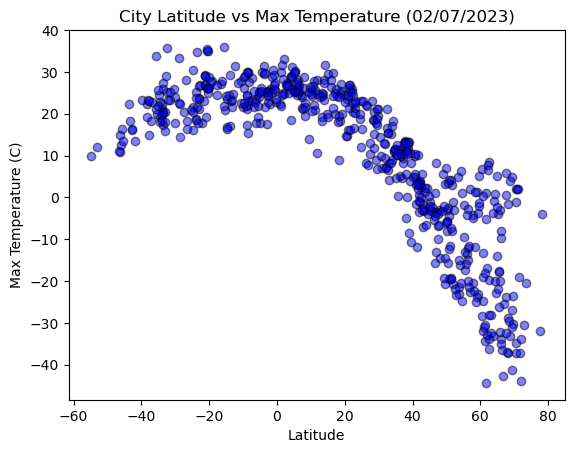

In [9]:
# Build scatter plot for latitude vs. temperature
today = time.strftime("%m/%d/%Y")
plt.scatter(city_data_df["Latitude"], city_data_df["Max Temp (C)"], facecolors="blue", edgecolors="black", alpha = 0.5)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title(f"City Latitude vs Max Temperature ({today})")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

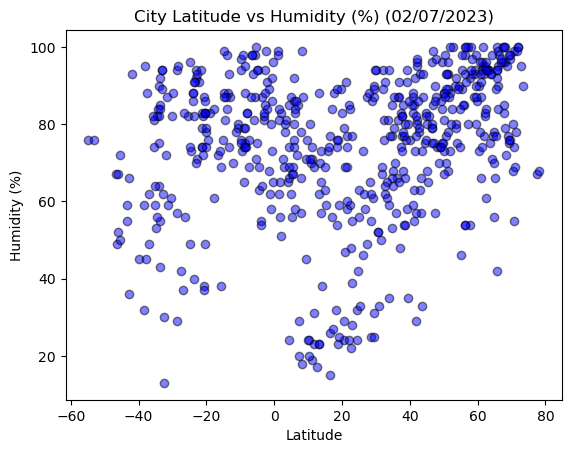

In [10]:
# Build the scatter plots for latitude vs. humidity
today = time.strftime("%m/%d/%Y")
plt.scatter(city_data_df["Latitude"], city_data_df["Humidity (%)"], facecolors="blue", edgecolors="black", alpha = 0.5)


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs Humidity (%) ({today})")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

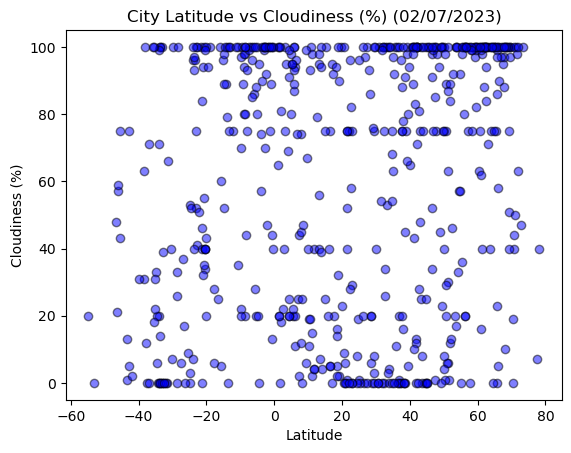

In [11]:
# Build the scatter plots for latitude vs. cloudiness
today = time.strftime("%m/%d/%Y")
plt.scatter(city_data_df["Latitude"], city_data_df["Cloudiness (%)"], facecolors="blue", edgecolors="black", alpha = 0.5)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs Cloudiness (%) ({today})")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

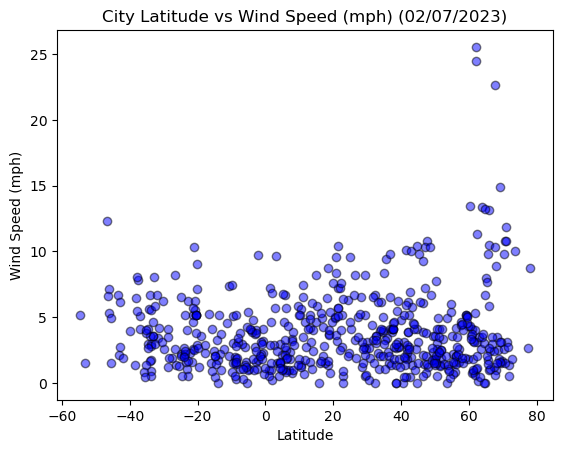

In [12]:
# Build the scatter plots for latitude vs. wind speed
today = time.strftime("%m/%d/%Y")
plt.scatter(city_data_df["Latitude"], city_data_df["Wind Speed (mph)"], facecolors="blue", edgecolors="black", alpha = 0.5)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs Wind Speed (mph) ({today})")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    print(f'The r-square is {rvalue}')
    print(line_eq)
    plt.annotate(line_eq,(regEQplotX,regEQplotY),fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(f'{y_label}')
    plt.grid()

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df  = city_data_df.loc[city_data_df["Latitude"] > 0]

# Display sample data
northern_hemi_df

,City,Country,Date,Latitude,Longitude,Cloudiness (%),Humidity (%),Max Temp (C),Wind Speed (mph)
City_ID,,,,,,,,,
0,andenes,NO,2023-02-07 22:36:49,69.3143,16.1194,75.0,75.0,4.96,14.92
2,acajutla,SV,2023-02-07 22:36:50,13.5928,-89.8275,7.0,70.0,24.73,3.12
4,clifton,US,2023-02-07 22:32:08,40.8584,-74.1638,100.0,83.0,4.90,3.09
5,nemuro,JP,2023-02-07 22:36:51,43.3236,145.5750,25.0,57.0,-3.24,1.34
7,torbay,CA,2023-02-07 22:36:51,47.6666,-52.7314,75.0,87.0,-3.12,10.80
...,...,...,...,...,...,...,...,...,...
615,sorland,NO,2023-02-07 22:41:31,67.6670,12.6934,100.0,85.0,5.92,22.62
616,san quintin,MX,2023-02-07 22:41:31,30.4833,-115.9500,0.0,52.0,14.45,0.23
617,san antonio,US,2023-02-07 22:35:52,29.4241,-98.4936,100.0,87.0,17.32,8.23


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df  = city_data_df.loc[city_data_df["Latitude"] < 0]

# Display sample data
southern_hemi_df

,City,Country,Date,Latitude,Longitude,Cloudiness (%),Humidity (%),Max Temp (C),Wind Speed (mph)
City_ID,,,,,,,,,
1,mataura,NZ,2023-02-07 22:36:50,-46.1927,168.8643,57.0,52.0,10.82,5.35
6,colac,AU,2023-02-07 22:35:06,-38.3333,143.5833,31.0,32.0,22.32,1.35
8,ushuaia,AR,2023-02-07 22:36:52,-54.8000,-68.3000,20.0,76.0,9.81,5.14
9,bluff,NZ,2023-02-07 22:36:52,-46.6000,168.3333,48.0,67.0,11.00,12.35
11,vao,NC,2023-02-07 22:36:52,-22.6667,167.4833,41.0,71.0,26.80,6.20
...,...,...,...,...,...,...,...,...,...
593,ilhabela,BR,2023-02-07 22:41:18,-23.7781,-45.3581,93.0,91.0,23.75,2.46
612,laela,TZ,2023-02-07 22:41:30,-8.5667,32.0500,100.0,88.0,15.39,1.58
618,khudumelapye,BW,2023-02-07 22:41:32,-23.8833,24.7500,100.0,88.0,18.49,1.95


###  Temperature vs. Latitude Linear Regression Plot

The r-square is -0.8722700090834719
y = -0.8x + 34.54


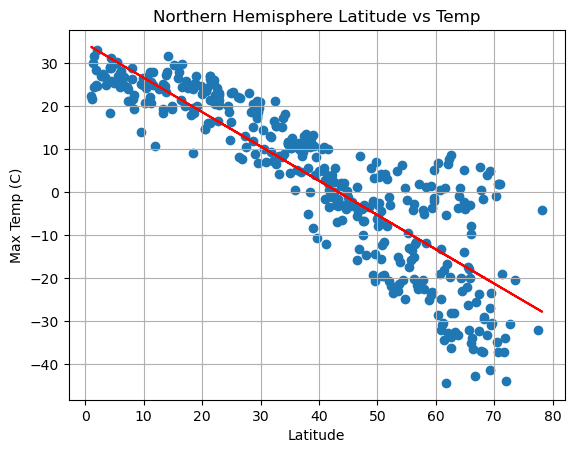

In [17]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Latitude"]
y_values = northern_hemi_df["Max Temp (C)"]
#tweak where the equation appears on the plot
regEQplotX = 0
regEQplotY = 40
#label the y axis

y_label = "Max Temp (C)"
#give the title
plt.title('Northern Hemisphere Latitude vs Temp')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
#save as a png to the neighboring output_data folder
plt.savefig("output_data/RegPlot1.png")
plt.show()

The r-square is 0.4289399314293228
y = 0.17x + 26.81


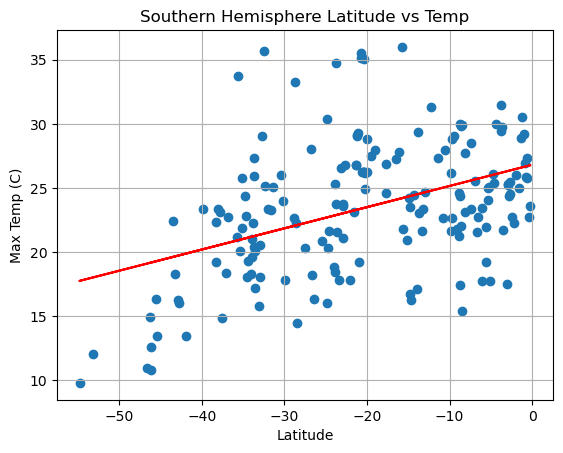

In [18]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Latitude"]
y_values = southern_hemi_df["Max Temp (C)"]
#tweak where the equation appears on the plot
regEQplotX = 0
regEQplotY = 40
#label the y axis

y_label = "Max Temp (C)"
#give the title
plt.title('Southern Hemisphere Latitude vs Temp')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
#save as a png to the neighboring output_data folder
plt.savefig("output_data/RegPlot2.png")
plt.show()

**Discussion about the linear relationship:** 

For Northern Hemisphere: The regression displays a negative correlation. As you move away from the equator the temperature decreases. 

For Southern Hemisphere:The regression displays a positive correlation. As you get closer to the equator the temperature increases.


### Humidity vs. Latitude Linear Regression Plot

The r-square is 0.45871507147884244
y = 0.45x + 56.62


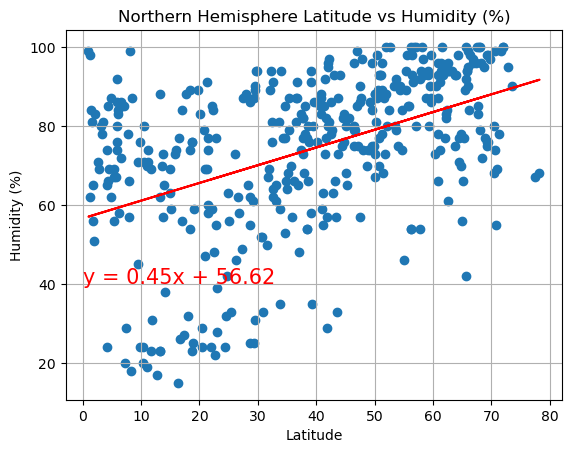

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df["Latitude"]
y_values = northern_hemi_df["Humidity (%)"]
#tweak where the equation appears on the plot
regEQplotX = 0
regEQplotY = 40
#label the y axis

y_label = "Humidity (%)"
#give the title
plt.title('Northern Hemisphere Latitude vs Humidity (%)')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
#save as a png to the neighboring output_data folder
plt.savefig("output_data/RegPlot3.png")
plt.show()

The r-square is 0.34568766883510404
y = 0.44x + 84.25


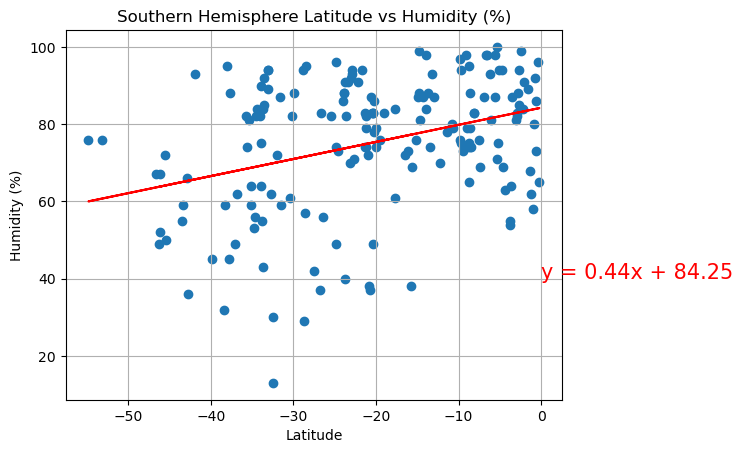

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df["Latitude"]
y_values = southern_hemi_df["Humidity (%)"]
#tweak where the equation appears on the plot
regEQplotX = 0
regEQplotY = 40
#label the y axis

y_label = "Humidity (%)"
#give the title
plt.title('Southern Hemisphere Latitude vs Humidity (%)')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
#save as a png to the neighboring output_data folder
plt.savefig("output_data/RegPlot4.png")
plt.show()

**Discussion about the linear relationship:** 

For both Northern and Southern Hemisphere: The regression does not show a strong correlation and the data points also look scaterred. Therefore, there doesnt seem to be a corelation between Latitude and Humidity.


### Cloudiness vs. Latitude Linear Regression Plot

The r-square is 0.2528522433867017
y = 0.48x + 41.51


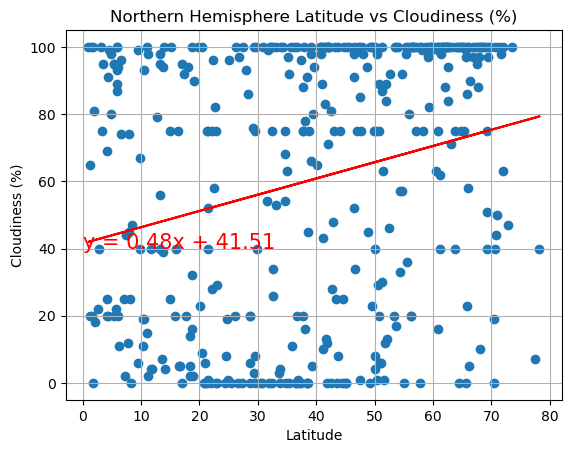

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df["Latitude"]
y_values = northern_hemi_df["Cloudiness (%)"]
#tweak where the equation appears on the plot
regEQplotX = 0
regEQplotY = 40
#label the y axis

y_label = "Cloudiness (%)"
#give the title
plt.title('Northern Hemisphere Latitude vs Cloudiness (%)')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
#save as a png to the neighboring output_data folder
plt.savefig("output_data/RegPlot5.png")
plt.show()

The r-square is 0.46308847605696596
y = 1.31x + 84.84


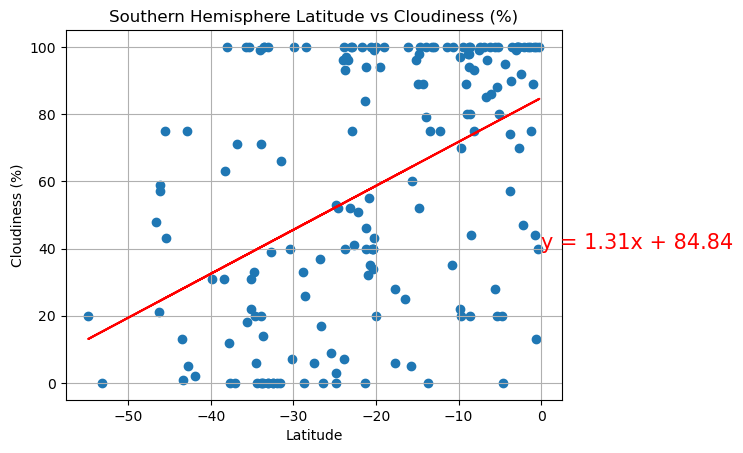

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df["Latitude"]
y_values = southern_hemi_df["Cloudiness (%)"]
#tweak where the equation appears on the plot
regEQplotX = 0
regEQplotY = 40
#label the y axis

y_label = "Cloudiness (%)"
#give the title
plt.title('Southern Hemisphere Latitude vs Cloudiness (%)')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
#save as a png to the neighboring output_data folder
plt.savefig("output_data/RegPlot6.png")
plt.show()

**Discussion about the linear relationship:** 

For both Northern and Southern Hemisphere: The regression does not show a strong correlation and the data points also look scaterred. Therefore, there doesnt seem to be a corelation between Latitude and Humidity.

### Wind Speed vs. Latitude Linear Regression Plot

The r-square is 0.11184267736348828
y = 0.02x + 3.15


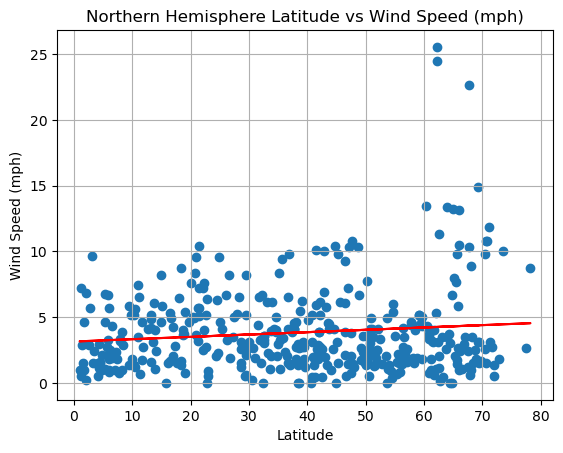

In [23]:
# Northern Hemisphere
x_values = northern_hemi_df["Latitude"]
y_values = northern_hemi_df["Wind Speed (mph)"]
#tweak where the equation appears on the plot
regEQplotX = 0
regEQplotY = 40
#label the y axis

y_label = "Wind Speed (mph)"
#give the title
plt.title('Northern Hemisphere Latitude vs Wind Speed (mph)')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
#save as a png to the neighboring output_data folder
plt.savefig("output_data/RegPlot7.png")
plt.show()

The r-square is -0.28917994461339475
y = -0.05x + 2.36


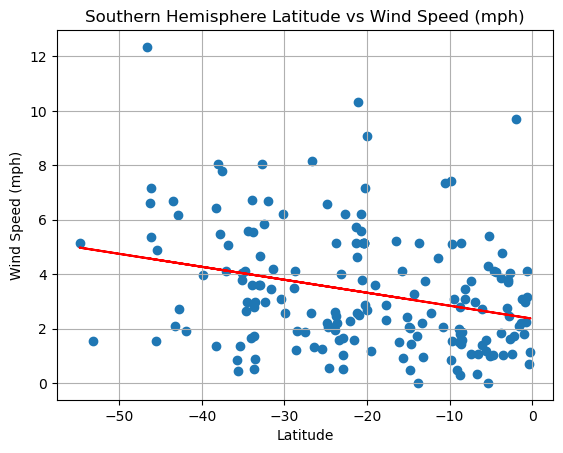

In [24]:
# Southern Hemisphere
x_values = southern_hemi_df["Latitude"]
y_values = southern_hemi_df["Wind Speed (mph)"]
#tweak where the equation appears on the plot
regEQplotX = 0
regEQplotY = 40
#label the y axis

y_label = "Wind Speed (mph)"
#give the title
plt.title('Southern Hemisphere Latitude vs Wind Speed (mph)')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
#save as a png to the neighboring output_data folder
plt.savefig("output_data/RegPlot8.png")
plt.show()

**Discussion about the linear relationship:** 

For both Northern and Southern Hemisphere: The regression does not show a strong correlation and the data points also look scaterred. Therefore, there doesnt seem to be a corelation between Latitude and Humidity.
